<a href="https://colab.research.google.com/github/dikshabhati1/flightfare_prediction/blob/master/flightfair_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files
uploaded=files.upload()

Saving datasets_140442_330428_Data_Train.xlsx to datasets_140442_330428_Data_Train.xlsx


In [3]:
import pandas as pd
import io
#reading a excel file and converting it into a dataframe object
train_df=pd.DataFrame(pd.read_excel(io.BytesIO(uploaded['datasets_140442_330428_Data_Train.xlsx'])))

In [4]:
from google.colab import files
uploaded1=files.upload()

Saving datasets_140442_330428_Test_set.xlsx to datasets_140442_330428_Test_set.xlsx


In [5]:
#reading a excel file and converting into a dataframe object
test_df=pd.DataFrame(pd.read_excel(io.BytesIO(uploaded1['datasets_140442_330428_Test_set.xlsx'])))

In [6]:
train_df.head(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
test_df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [10]:
train_shape=train_df.shape
test_shape=test_df.shape
print("Train dataset shape: ", train_shape)
print("Test dataset shape: ",test_shape)

Train dataset shape:  (10683, 11)
Test dataset shape:  (2671, 10)


In [11]:
#basic statistical data
train_df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [12]:
#null values
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

*From above we can see that in train dataset we have only 1 null value in row column and 1 null value in total_stops column so we can drop these two null value rows*


In [13]:
#dropping null values 
train_df.dropna(inplace=True)

In [14]:
train_df.shape

(10682, 11)

In [15]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

*In train dataset we do not have any null values*


In [16]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Text(0, 0.5, 'Total_Stops')

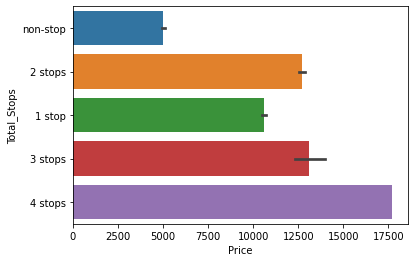

In [17]:
barplot=sns.barplot(train_df['Price'],train_df['Total_Stops'])
barplot.set_xlabel('Price')
barplot.set_ylabel('Total_Stops')

*We can see that the price is highest for 4 stops and lowest for 0 stops,so the price is increasing as the number of stops increasing*

[Text(0, 0, 'IndiGo'),
 Text(0, 0, 'Air India'),
 Text(0, 0, 'Jet Airways'),
 Text(0, 0, 'SpiceJet'),
 Text(0, 0, 'Multiple carriers'),
 Text(0, 0, 'GoAir'),
 Text(0, 0, 'Vistara'),
 Text(0, 0, 'Air Asia'),
 Text(0, 0, 'Vistara Premium economy'),
 Text(0, 0, 'Jet Airways Business'),
 Text(0, 0, 'Multiple carriers Premium economy'),
 Text(0, 0, 'Trujet')]

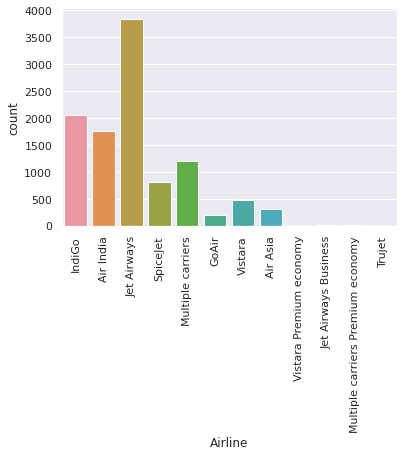

In [18]:
sns.set(style='darkgrid')
countplot=sns.countplot(x='Airline',data=train_df)
countplot.set_xticklabels(countplot.get_xticklabels(),rotation=90)

*So maximum flights are in "Jet Airways" and minimum are in "Vistara Premium economy" , "Jet Airways Buisness" , "Multiple carriers Premium economy" and "Trujet"* 

**HANDLING CATEGORICAL DATA**

In [19]:
#number of distinct airlines present in train data
train_df['Airline'].nunique()

12

In [20]:
#number of distinct airlines present in test data
test_df['Airline'].nunique()

11

In [21]:
#value count for each distinct airline in train data
train_df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [22]:
#value count for each distinct airline in test data
test_df['Airline'].value_counts()

Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

In [23]:
#number of distinct destination present in train dataset
train_df['Destination'].nunique()

6

In [24]:
#number of distinct destination present in test dataset
test_df['Destination'].nunique()

6

In [25]:
#value count for each distinct destination in train dataset
train_df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [26]:
#value count for each distinct destination in test dataset
test_df['Destination'].value_counts()

Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64

In [27]:
#value count for each distinct source in train data
train_df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [28]:
#value count for each distinct source in test data
test_df['Source'].value_counts()

Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

In [29]:
#value count for each distict Additional_Info in train data
train_df['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
2 Long layover                     1
Red-eye flight                     1
Name: Additional_Info, dtype: int64

In [30]:
#value count for each distict Additional_Info in test data
test_df['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
1 Long layover                     1
Business class                     1
Change airports                    1
Name: Additional_Info, dtype: int64

In [31]:
#from above we can that majority of part contain no info
#so we can drop the Additional_Info column
train_df.drop(['Additional_Info'],axis=1,inplace=True)
test_df.drop(['Additional_Info'],axis=1,inplace=True)

In [32]:
#doing OneHotEncoding on 'Airline' , 'estination' and 'Source' column
train_Airline=pd.get_dummies(train_df[['Airline']],drop_first=True)
train_Destination=pd.get_dummies(train_df[['Destination']],drop_first=True)
train_Source=pd.get_dummies(train_df[['Source']],drop_first=True)

test_Airline=pd.get_dummies(test_df[['Airline']],drop_first=True)
test_Destination=pd.get_dummies(test_df[['Destination']],drop_first=True)
test_Source=pd.get_dummies(test_df[['Source']],drop_first=True)

In [33]:
train_Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [34]:
test_Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0


In [35]:
train_Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [36]:
test_Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,0,1,0,0,0


In [37]:
train_Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [38]:
test_Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,0,1,0,0
4,0,0,0,0


In [39]:
#value count for no of stops for train data
train_df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [40]:
#value count for no of stops for test data
test_df['Total_Stops'].value_counts()

1 stop      1431
non-stop     849
2 stops      379
3 stops       11
4 stops        1
Name: Total_Stops, dtype: int64

In [41]:
#converting object values into integer in Total_Stops 
train_df['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)
test_df['Total_Stops'].replace(['1 stop', 'non-stop', '2 stops', '3 stops', '4 stops'], [1, 0, 2, 3, 4], inplace=True)

In [42]:
#Route column as Route and Total Stops column are related to each other
train_df.drop(['Route'],axis=1,inplace=True)
test_df.drop(['Route'],axis=1,inplace=True)

In [43]:
#drop Airline,Source,Destination columns
train_df.drop(['Airline','Source','Destination'],axis=1,inplace=True)
test_df.drop(['Airline','Source','Destination'],axis=1,inplace=True)

**EDA**

In [44]:
#convert duration times in minutes
train_df['Duration_min']=train_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)
test_df['Duration_min']=test_df['Duration'].str.replace("h", '*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [45]:
#drop "Duration" column
train_df.drop(['Duration'],axis=1,inplace=True)
test_df.drop(['Duration'],axis=1,inplace=True)

In [46]:
#Extracting departure hours and departure minutes from "Dep_Time " column
train_df['Dep_hour']=pd.to_datetime(train_df.Dep_Time).dt.hour
train_df['Dep_min']=pd.to_datetime(train_df.Dep_Time).dt.minute

test_df['Dep_hour']=pd.to_datetime(test_df.Dep_Time).dt.hour
test_df['Dep_min']=pd.to_datetime(test_df.Dep_Time).dt.minute

In [47]:
#Now we can don't need "Dep_Time" column,so we can drop this column
#drop Dep_Time column
train_df.drop(["Dep_Time"],axis=1,inplace=True)
test_df.drop(["Dep_Time"],axis=1,inplace=True)

In [48]:
#Similarly , Extracting arrival hour,arrival minutes from "Arrival_Time" column
train_df['Arrival_hour']=pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df['Arrival_min']=pd.to_datetime(train_df.Arrival_Time).dt.minute

test_df['Arrival_hour']=pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df['Arrival_min']=pd.to_datetime(test_df.Arrival_Time).dt.minute

In [49]:
#drop "Arrival_Time" column
train_df.drop(['Arrival_Time'],axis=1,inplace=True)
test_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [50]:
#Extracting journey day, journey month, journey year,journey weekday from date of journey
train_df['Journey_Day'] = pd.to_datetime(train_df.Date_of_Journey, format='%d/%m/%Y').dt.day
train_df['Journey_Month'] = pd.to_datetime(train_df.Date_of_Journey, format='%d/%m/%Y').dt.month
train_df['Journey_Year']= pd.to_datetime(train_df.Date_of_Journey, format='%d/%m/%Y').dt.year
train_df['Journey_Weekday']= pd.to_datetime(train_df.Date_of_Journey, format='%d/%m/%Y').dt.weekday

test_df['Journey_Day'] = pd.to_datetime(test_df.Date_of_Journey, format='%d/%m/%Y').dt.day
test_df['Journey_Month'] = pd.to_datetime(test_df.Date_of_Journey, format='%d/%m/%Y').dt.month
test_df['Journey_Year']= pd.to_datetime(test_df.Date_of_Journey, format='%d/%m/%Y').dt.year
test_df['Journey_Weekday']= pd.to_datetime(test_df.Date_of_Journey, format='%d/%m/%Y').dt.weekday

[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6')]

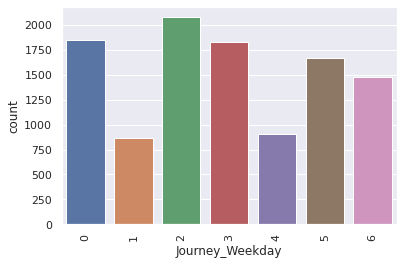

In [53]:
sns.set(style='darkgrid')
countplot=sns.countplot(x='Journey_Weekday',data=train_df)
countplot.set_xticklabels(countplot.get_xticklabels(),rotation=90)

In [54]:
train_df['Journey_Year']

0        2019
1        2019
2        2019
3        2019
4        2019
         ... 
10678    2019
10679    2019
10680    2019
10681    2019
10682    2019
Name: Journey_Year, Length: 10682, dtype: int64

In [55]:
test_df['Journey_Year']

0       2019
1       2019
2       2019
3       2019
4       2019
        ... 
2666    2019
2667    2019
2668    2019
2669    2019
2670    2019
Name: Journey_Year, Length: 2671, dtype: int64

In [56]:
#Journey_Year column contain only 2019 year,so we can drop this column 
#dropping "Journey_Year" column  
train_df.drop(['Journey_Year'],axis=1,inplace=True)
test_df.drop(['Journey_Year'],axis=1,inplace=True)
#dropping "Date_of_Journey" column
train_df.drop(['Date_of_Journey'],axis=1,inplace=True)
test_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [57]:
#concate dataframes 
train_data=pd.concat([train_df,train_Airline,train_Source,train_Destination],axis=1) 
test_data=pd.concat([test_df,test_Airline,test_Source,test_Destination],axis=1) 

In [58]:
train_data.head()

,Total_Stops,Price,Duration_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_Day,Journey_Month,Journey_Weekday,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,170,22,20,1,10,24,3,6,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,445,5,50,13,15,1,5,2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,1140,9,25,4,25,9,6,6,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,325,18,5,23,30,12,5,6,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,285,16,50,21,35,1,3,4,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [59]:
test_data.head()

,Total_Stops,Duration_min,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Journey_Day,Journey_Month,Journey_Weekday,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,655,17,30,4,25,6,6,3,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,240,6,20,10,20,12,5,6,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,1425,19,15,19,0,21,5,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,780,8,0,21,0,21,5,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,170,23,55,2,45,24,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


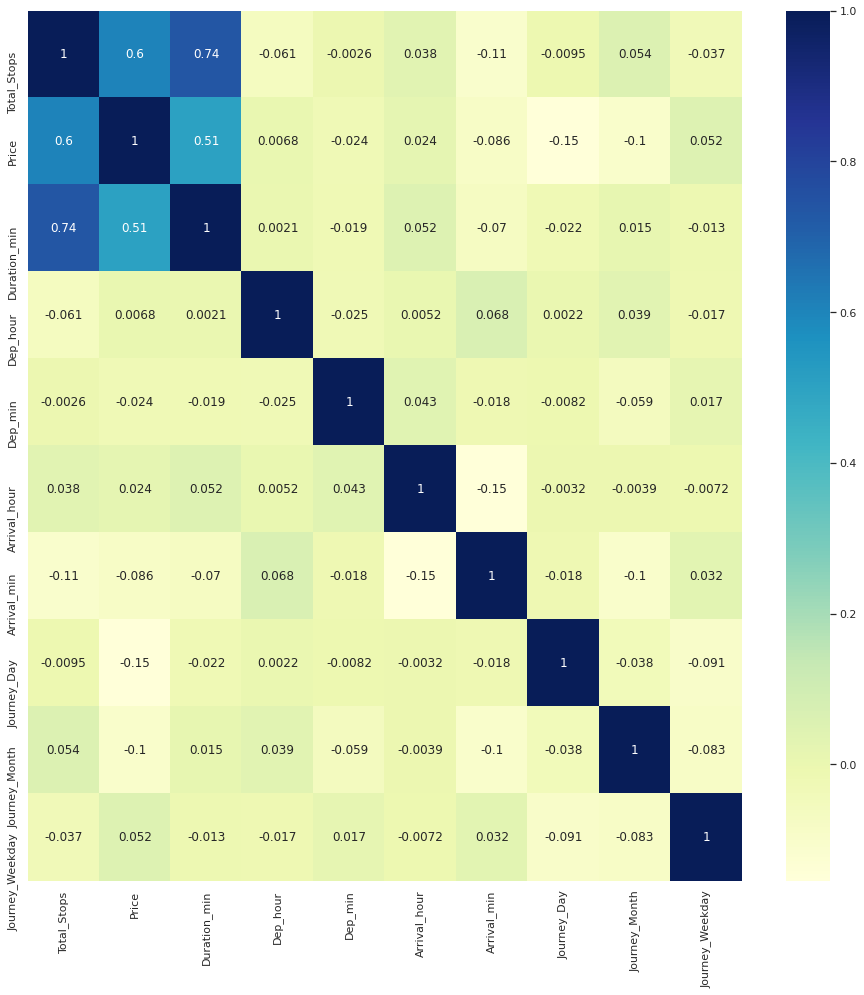

In [60]:
plt.figure(figsize=(16,16))
sns.heatmap(train_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

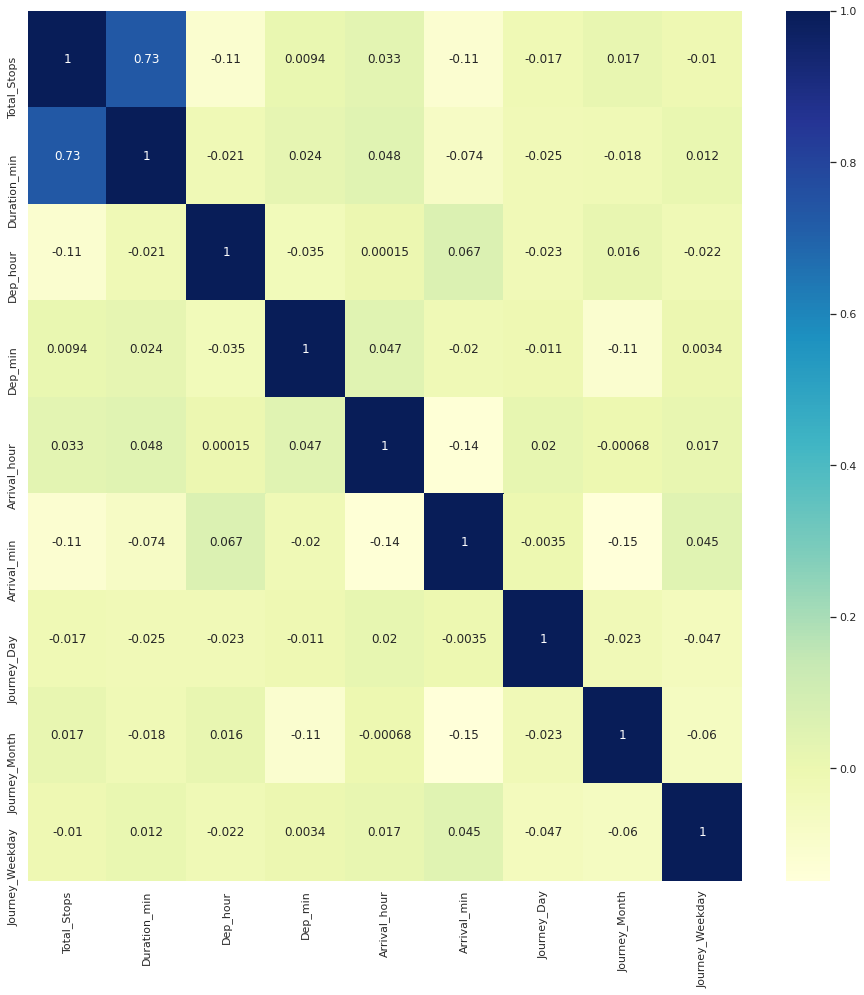

In [61]:
plt.figure(figsize=(16,16))
sns.heatmap(test_df.corr(),annot=True,cmap="YlGnBu")
plt.show()

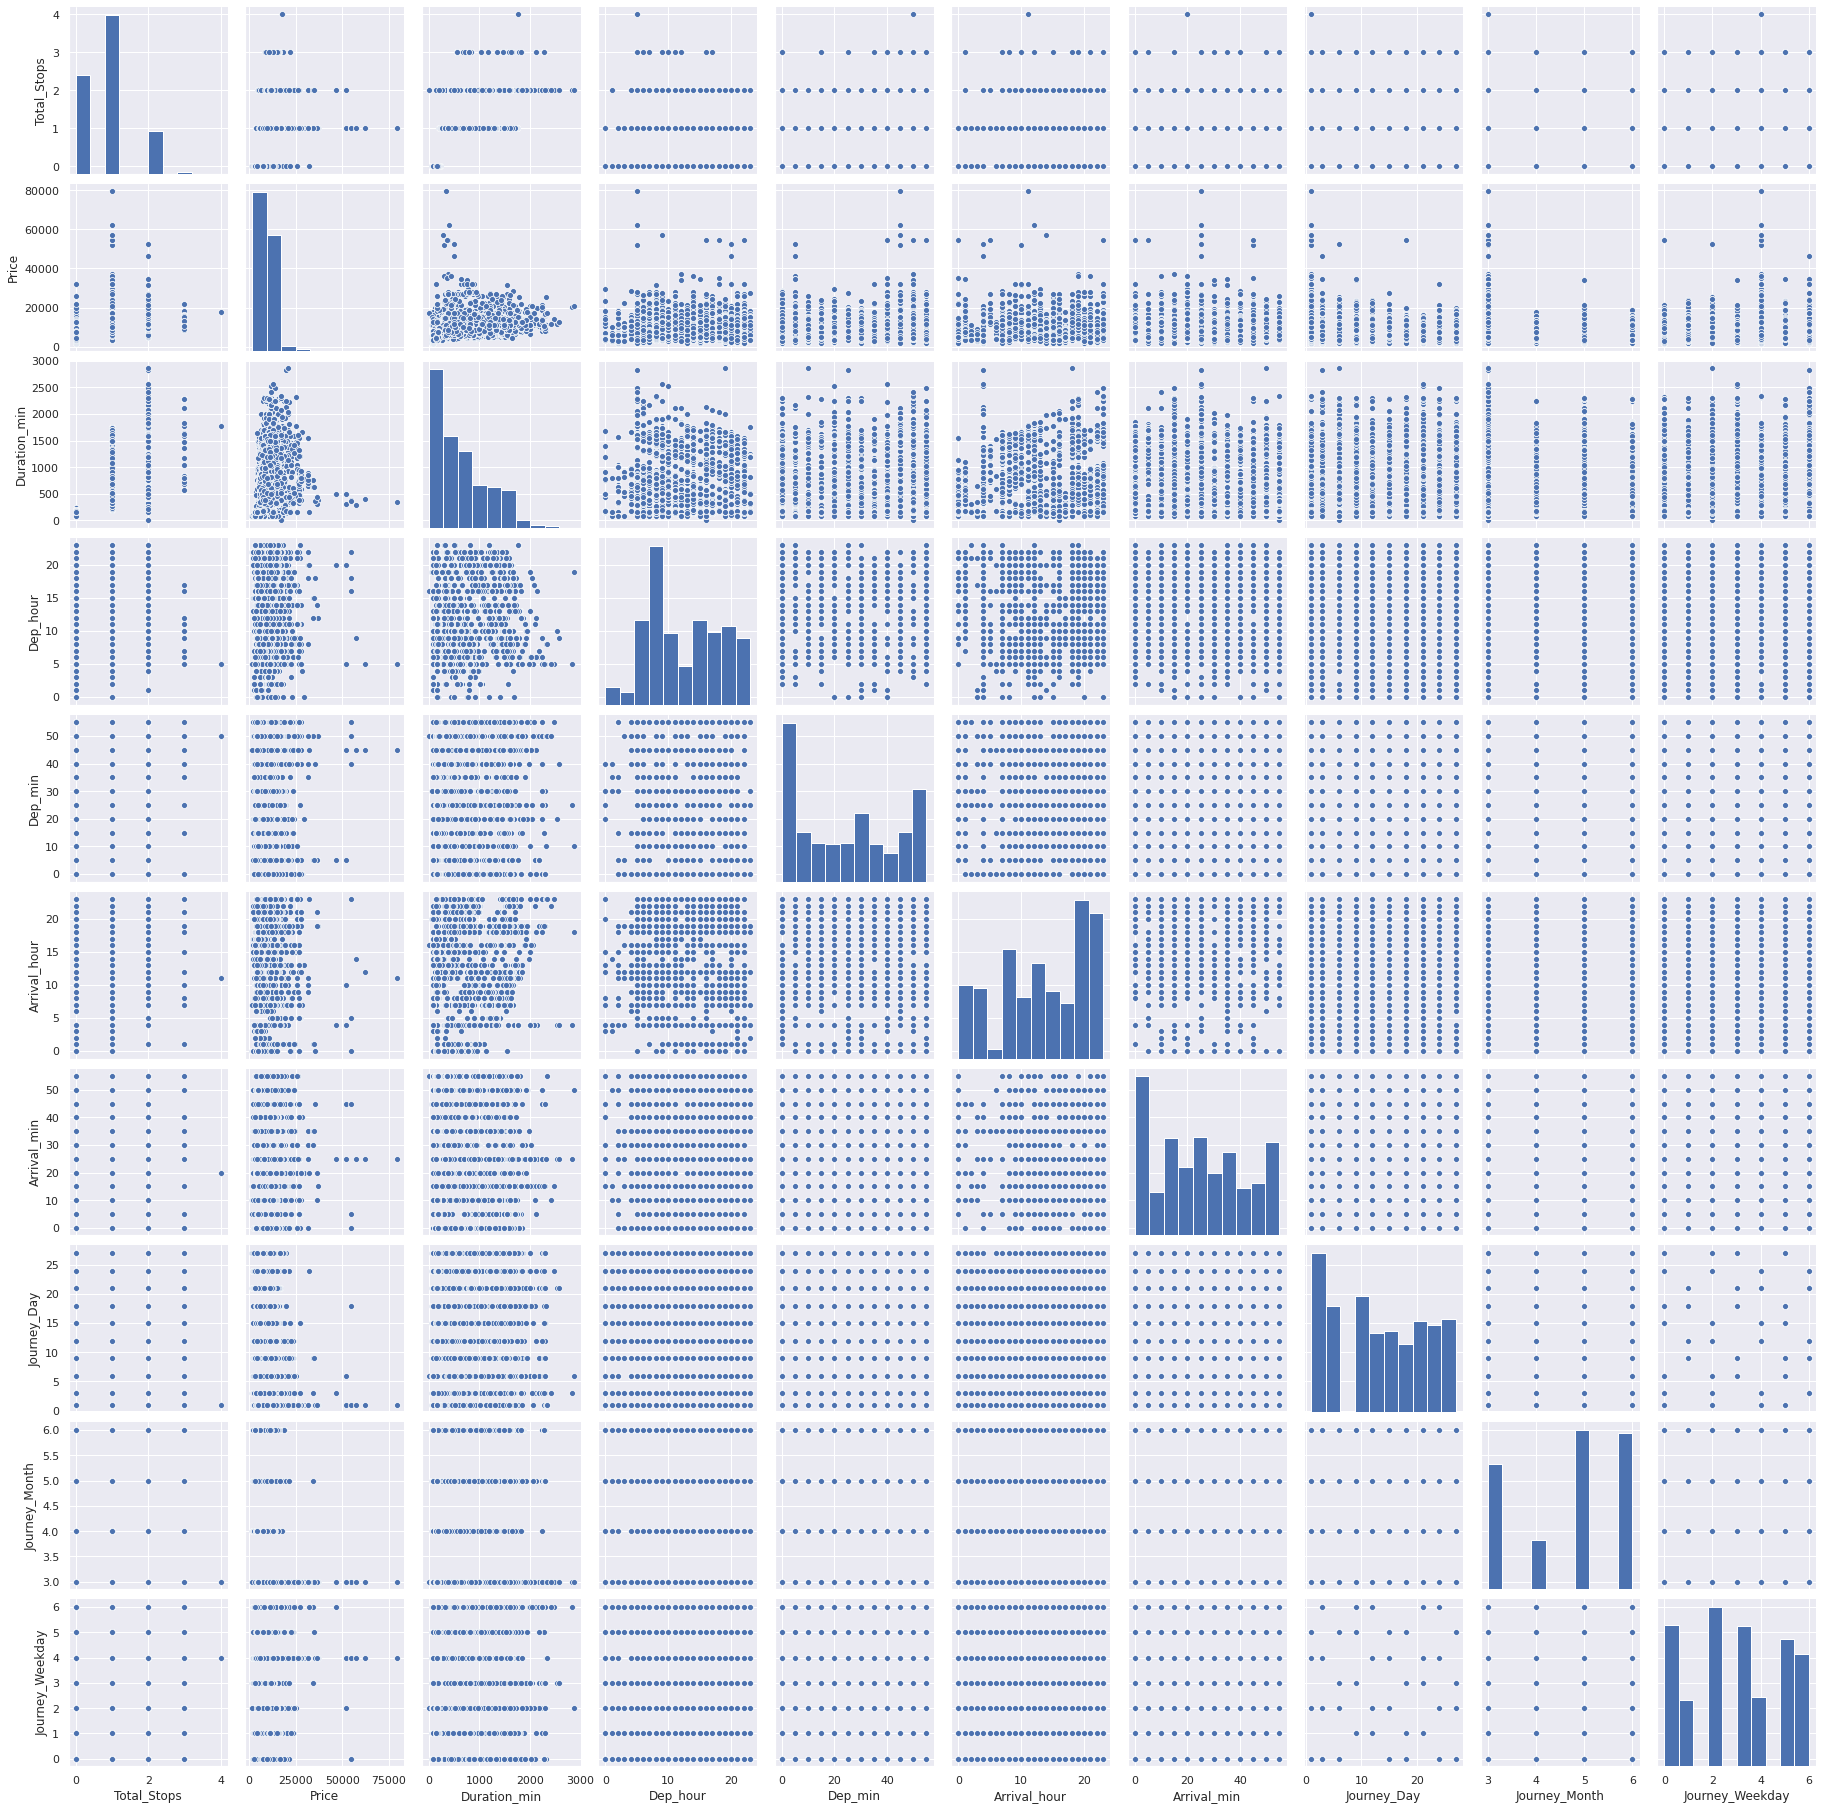

In [62]:
sns.pairplot(train_df)

In [63]:
y=train_data['Price']
X=train_data.drop(['Price'],axis=1)

In [64]:
#splitting the dataset as training and testing dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=111)

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
import numpy as np

In [75]:
import xgboost
xg=xgboost.XGBRegressor()

#parameters
n_estimators=[int(i) for i in np.linspace(start=100,stop=1000,num=10)]
max_depth=[int(j) for j in np.linspace(start=2,stop=20,num=4)]
booster=['gbtree','dart','gblinear']
min_child_weight=[1,2,3,4,5]
learning_rate=[0.01,0.03,0.1,0.3]
base_score=[0.25,0.5,0.75,1]

#hyperparameter grid
hyperparameter_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'booster':booster,
    'min_child_weight':min_child_weight,
    'learning_rate':learning_rate,
    'base_score':base_score
}

random_cv=RandomizedSearchCV(estimator=xg,param_distributions=hyperparameter_grid,
                             cv=5,n_iter=5,scoring='neg_mean_absolute_error',n_jobs=1,verbose=3,return_train_score=True,random_state=121)
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[CV] n_estimators=600, min_child_weight=2, max_depth=20, learning_rate=0.1, booster=gblinear, base_score=0.5 
[05:42:12] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=600, min_child_weight=2, max_depth=20, learning_rate=0.1, booster=gblinear, base_score=0.5, score=(train=-2509.595, test=-2536.300), total=   1.9s
[CV] n_estimators=600, min_child_weight=2, max_depth=20, learning_rate=0.1, booster=gblinear, base_score=0.5 
[05:42:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.9s remaining:    0.0s


[CV]  n_estimators=600, min_child_weight=2, max_depth=20, learning_rate=0.1, booster=gblinear, base_score=0.5, score=(train=-2519.477, test=-2505.352), total=   1.8s
[CV] n_estimators=600, min_child_weight=2, max_depth=20, learning_rate=0.1, booster=gblinear, base_score=0.5 
[05:42:16] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    3.8s remaining:    0.0s


[CV]  n_estimators=600, min_child_weight=2, max_depth=20, learning_rate=0.1, booster=gblinear, base_score=0.5, score=(train=-2514.033, test=-2498.873), total=   1.8s
[CV] n_estimators=600, min_child_weight=2, max_depth=20, learning_rate=0.1, booster=gblinear, base_score=0.5 
[05:42:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=600, min_child_weight=2, max_depth=20, learning_rate=0.1, booster=gblinear, base_score=0.5, score=(train=-2530.338, test=-2480.500), total=   1.8s
[CV] n_estimators=600, min_child_weight=2, max_depth=20, learning_rate=0.1, booster=gblinear, base_score=0.5 
[05:42:19] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  n_estimators=600, min_child_weight=2, max_depth=20, learning_rate=0.1, booster=gblinear, base_score=0.5, score=(train=-2498.865, test=-2572.165), total=   1.8s
[CV] n_estimators=300, min_c

[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  4.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1, gamma=0,
                                          importance_type='gain',
                                          learning_rate=0.1, max_delta_step=0,
                                          max_depth=3, min_child_weight=1,
                                          missing=None, n_estimators=100,
                                          n_jobs=1, nthread=None,
                                          objective='reg:linear',
                                          random_state=0, reg_alpha=...
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'dart',
                                          

In [76]:
#best parameter in xgboost
random_cv.best_params_

{'base_score': 1,
 'booster': 'dart',
 'learning_rate': 0.1,
 'max_depth': 14,
 'min_child_weight': 4,
 'n_estimators': 200}

In [79]:
#predicting values
prediction_xg=random_cv.predict(X_test)

In [80]:
#calculating mean absolute error of xgboost
from sklearn import metrics
metrics.mean_absolute_error(y_test,prediction_xg)

1269.9166736438542

In [67]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()

#parameters
n_estimators=[100,200,300,400,500,600,700,800,900,1000]
max_depth=[2,4,6,8,10,12,14]
min_samples_split=[5,15,25,35,45,55]
max_features=['auto','sqrt','log2']
min_samples_leaf=[2,4,6,8]

#hyperparameter grid
hyper_grid={
    'n_estimators':n_estimators,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'max_features':max_features,
    'min_samples_leaf':min_samples_leaf
}
random_cv2=RandomizedSearchCV(estimator=reg,param_distributions=hyper_grid,
                              cv=5,n_iter=20,scoring='neg_mean_absolute_error',verbose=3,n_jobs=1,random_state=121
                              )
#fitting X_train and y_tarin
random_cv2.fit(X_train,y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV] n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10, score=-1573.328, total=   2.1s
[CV] n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.1s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10, score=-1588.719, total=   2.2s
[CV] n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    4.3s remaining:    0.0s


[CV]  n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10, score=-1601.949, total=   2.2s
[CV] n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10 
[CV]  n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10, score=-1615.250, total=   2.1s
[CV] n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10 
[CV]  n_estimators=500, min_samples_split=35, min_samples_leaf=2, max_features=log2, max_depth=10, score=-1651.048, total=   2.2s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=14 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=14, score=-1289.536, total=   3.9s
[CV] n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=14 
[CV]  n_estimators=600, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_dep

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  4.2min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [68]:
#best parameters of random forest
random_cv2.best_params_

{'max_depth': 14,
 'max_features': 'auto',
 'min_samples_leaf': 4,
 'min_samples_split': 15,
 'n_estimators': 200}

In [77]:
#predicting values
prediction_rf=random_cv2.predict(X_test)

In [78]:
#calculating mean absolute error of random forest
from sklearn import metrics
metrics.mean_absolute_error(y_test,prediction)

1202.6884309433358